## DESCRIPTION
For safe and secure lending experience, it's important to analyze the past data. In this
project, you have to build a deep learning model to predict the chance of default for
future loans using the historical data. As you will see, this dataset is highly
imbalanced and includes a lot of features that make this problem more challenging. 

## Objective:
Create a model that predicts whether or not an applicant will be able to
repay a loan using historical data.

## Analysis to be done: 
Perform data preprocessing and build a deep learning prediction
model. 

## Steps to be done: 
    ⦁ Load the dataset that is given to you
    ⦁ Check for null values in the dataset 
    ⦁ Print percentage of default to payer of the dataset for the TARGET column
    ⦁ Balance the dataset if the data is imbalanced
    ⦁ Plot the balanced data or imbalanced data
    ⦁ Encode the columns that is required for the model 
    ⦁ Calculate Sensitivity as a metrice
    ⦁ Calculate area under receiver operating characteristics curve

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_rows', None)

# ⦁ Load the dataset that is given to you

In [3]:
loan_data = pd.read_csv("loan_data.csv")

In [4]:
loan_data.head(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
5,100008,0,Cash loans,M,N,Y,0,99000.0,490495.5,27517.5,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,1.0
6,100009,0,Cash loans,F,Y,Y,1,171000.0,1560726.0,41301.0,...,0,0,0,0,0.0,0.0,0.0,1.0,1.0,2.0
7,100010,0,Cash loans,M,Y,Y,0,360000.0,1530000.0,42075.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
8,100011,0,Cash loans,F,N,Y,0,112500.0,1019610.0,33826.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
9,100012,0,Revolving loans,M,N,Y,0,135000.0,405000.0,20250.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan_data.tail(10)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
307501,456245,0,Cash loans,F,N,Y,3,81000.0,269550.0,11871.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307502,456246,0,Cash loans,F,N,Y,1,94500.0,225000.0,10620.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
307503,456247,0,Cash loans,F,N,Y,0,112500.0,345510.0,17770.5,...,0,0,0,0,0.0,0.0,0.0,1.0,0.0,2.0
307504,456248,0,Cash loans,F,N,Y,0,153000.0,331920.0,16096.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307505,456249,0,Cash loans,F,N,Y,0,112500.0,225000.0,22050.0,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,0.0
307506,456251,0,Cash loans,M,N,N,0,157500.0,254700.0,27558.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307507,456252,0,Cash loans,F,N,Y,0,72000.0,269550.0,12001.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
307508,456253,0,Cash loans,F,N,Y,0,153000.0,677664.0,29979.0,...,0,0,0,0,1.0,0.0,0.0,1.0,0.0,1.0
307509,456254,1,Cash loans,F,N,Y,0,171000.0,370107.0,20205.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
307510,456255,0,Cash loans,F,N,N,0,157500.0,675000.0,49117.5,...,0,0,0,0,0.0,0.0,0.0,2.0,0.0,1.0


# ⦁ Check for null values in the dataset 

In [6]:
loan_data.isnull().sum()

SK_ID_CURR                           0
TARGET                               0
NAME_CONTRACT_TYPE                   0
CODE_GENDER                          0
FLAG_OWN_CAR                         0
FLAG_OWN_REALTY                      0
CNT_CHILDREN                         0
AMT_INCOME_TOTAL                     0
AMT_CREDIT                           0
AMT_ANNUITY                         12
AMT_GOODS_PRICE                    278
NAME_TYPE_SUITE                   1292
NAME_INCOME_TYPE                     0
NAME_EDUCATION_TYPE                  0
NAME_FAMILY_STATUS                   0
NAME_HOUSING_TYPE                    0
REGION_POPULATION_RELATIVE           0
DAYS_BIRTH                           0
DAYS_EMPLOYED                        0
DAYS_REGISTRATION                    0
DAYS_ID_PUBLISH                      0
OWN_CAR_AGE                     202929
FLAG_MOBIL                           0
FLAG_EMP_PHONE                       0
FLAG_WORK_PHONE                      0
FLAG_CONT_MOBILE         

# ⦁ Print percentage of default to payer of the dataset for the TARGET column

In [7]:
percentage = loan_data["TARGET"].value_counts()
percentage

0    282686
1     24825
Name: TARGET, dtype: int64

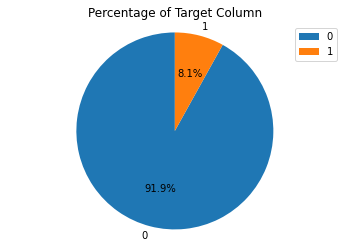

In [8]:
plt.pie(percentage, labels = percentage.index, startangle = 90, autopct = '%1.1f%%')
plt.title("Percentage of Target Column")
plt.axis('equal')
plt.legend()
plt.show()

From Chart, We can see that the percentage of "0" is 11 times greater than the percentage of "1". So our data is imbalanced.

# ⦁ Balance the dataset if the data is imbalanced

In [9]:
# Under Sampling of Data 
# 0 -> Non Fraud
# 1 -> Fraud 

no_fraud = loan_data[loan_data["TARGET"] == 0].index
fraud = loan_data[loan_data["TARGET"] == 1].index

random_index = np.random.choice(no_fraud, len(fraud), replace = False)
len(random_index)

undersample_index = np.concatenate([fraud, random_index])
len(undersample_index)

undersample = loan_data.iloc[undersample_index,:]

In [10]:
un_percentage = undersample["TARGET"].value_counts()
un_percentage

1    24825
0    24825
Name: TARGET, dtype: int64

In [11]:
# Over Sampling of Data 
# 0 -> Non Fraud
# 1 -> Fraud 
no_fraud = loan_data[loan_data["TARGET"] == 0].index
fraud = loan_data[loan_data["TARGET"] == 1].index

# Random_index for fraud with mejority class 
random_index = np.array(np.random.choice(fraud, len(no_fraud), replace = True))

oversample_index = np.concatenate([no_fraud, random_index])

oversample = loan_data.iloc[oversample_index,:]

In [12]:
ov_percentage = oversample["TARGET"].value_counts()
ov_percentage

0    282686
1    282686
Name: TARGET, dtype: int64

# ⦁ Plot the balanced data or imbalanced data

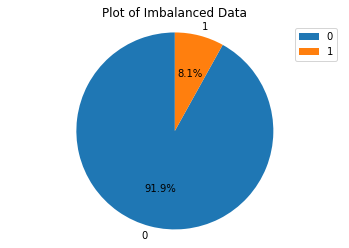

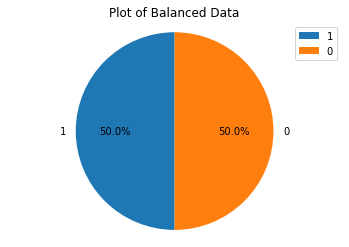

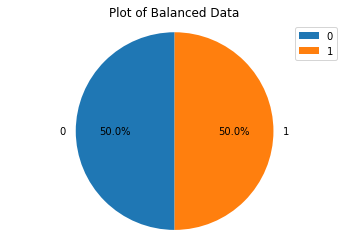

In [13]:
#plt.subplot(1, 2, 1)
plt.pie(percentage, labels = percentage.index, startangle = 90, autopct = '%1.1f%%')
plt.title("Plot of Imbalanced Data")
plt.axis('equal')
plt.legend()
plt.show()

#plt.subplot(1, 2, 2)
plt.pie(un_percentage, labels = un_percentage.index, startangle = 90, autopct = '%1.1f%%')
plt.title("Plot of Balanced Data")
plt.axis('equal')
plt.legend()
plt.show()

#plt.subplot(1, 3, 3)
plt.pie(ov_percentage, labels = ov_percentage.index, startangle = 90, autopct = '%1.1f%%')
plt.title("Plot of Balanced Data")
plt.axis('equal')
plt.legend()
plt.show()

# ⦁ Encode the columns that is required for the model

In [14]:
loan_data.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
loan_data.select_dtypes(include=['object']).columns

Index(['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'],
      dtype='object')

In [22]:
df = loan_data.drop(columns = ['NAME_CONTRACT_TYPE', 'CODE_GENDER', 'FLAG_OWN_CAR', 'FLAG_OWN_REALTY',
       'NAME_TYPE_SUITE', 'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE',
       'NAME_FAMILY_STATUS', 'NAME_HOUSING_TYPE', 'OCCUPATION_TYPE',
       'WEEKDAY_APPR_PROCESS_START', 'ORGANIZATION_TYPE', 'FONDKAPREMONT_MODE',
       'HOUSETYPE_MODE', 'WALLSMATERIAL_MODE', 'EMERGENCYSTATE_MODE'])

In [37]:
df = df.dropna()

In [38]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
 
#df['Y']=le.fit_transform(df['Y'])

In [39]:
x = df.drop(columns = ["TARGET"])
 
y = df["TARGET"]

In [43]:
from sklearn.model_selection import train_test_split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [45]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [46]:
from sklearn.pipeline import Pipeline
 
lr = Pipeline([('logistic classifier',LogisticRegression())])
svc = Pipeline([('support vector',SVC())])
knn = Pipeline([('Nearest Neighbor',KNeighborsClassifier())])
ngb = Pipeline([('Naive Bayes',GaussianNB())])
rf = Pipeline([('Random Forest', RandomForestClassifier())])
 
pipelines = [lr, svc, knn, ngb, rf]

In [47]:
pipe_dict = {0:"logistic classifier", 1:"support vector", 2:"Nearest Neighbor", 3:"Naive Bayes", 4:"Random Forest"}

In [48]:
def train():
    for pipe in pipelines:
        pipe.fit(x_train,y_train)

In [49]:
def accuracy_score():
    for i, model in enumerate(pipelines):
        print("For",pipe_dict[i]," Accuracy is : ", model.score(x_test,y_test))

In [50]:
def best_model():
    best_accuracy = 0
    best_classifier = 0
    best_pipline = ""
    for i, model in enumerate(pipelines):
        if best_accuracy < model.score(x_test,y_test):
            best_accuracy = model.score(x_test,y_test)
            best_pipline = model
            best_classifier = pipe_dict[i]
    
    print("Best Accuracy Model = {}, with accuracy = {}".format(best_classifier,best_accuracy))

In [51]:
Train = train()
Accuracy = accuracy_score()
Best_Model = best_model()

C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


For logistic classifier  Accuracy is :  0.9343901365037428
For support vector  Accuracy is :  0.9343901365037428
For Nearest Neighbor  Accuracy is :  0.9343901365037428
For Naive Bayes  Accuracy is :  0.9343901365037428
For Random Forest  Accuracy is :  0.9343901365037428
Best Accuracy Model = logistic classifier, with accuracy = 0.9343901365037428


# ⦁ Calculate Sensitivity as a metrice

In [52]:
# Here all models gives us Best Accuracy, now we are explore Random Forest Classifier

In [53]:
from sklearn.ensemble import RandomForestClassifier

In [54]:
model = RandomForestClassifier()

In [55]:
model.fit(x_train, y_train)

RandomForestClassifier()

In [56]:
y_pred = model.predict(x_test)

Accuracy is :  0.9343901365037428
[[2122    0]
 [ 149    0]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.97      2122
           1       0.00      0.00      0.00       149

    accuracy                           0.93      2271
   macro avg       0.47      0.50      0.48      2271
weighted avg       0.87      0.93      0.90      2271



C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Admin\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

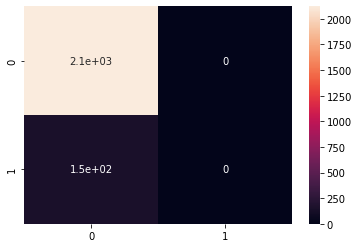

In [57]:
# Model Evaluation 
 
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
 
print("Accuracy is : ", accuracy_score(y_test, y_pred))
 
cm = confusion_matrix(y_test, y_pred)
print(cm)
 
sns.heatmap(cm, annot = True)
 
print(classification_report(y_test, y_pred))

# ⦁ Calculate area under receiver operating characteristics curve

In [58]:
from sklearn import metrics

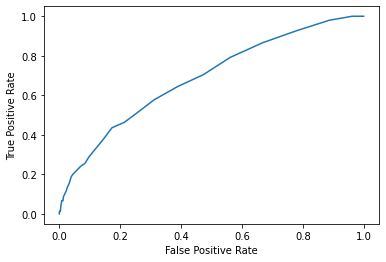

In [60]:
#define metrics
y_pred_proba = model.predict_proba(x_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# <div align="center"> Thank You... </div>